In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
import pandas as pd
data = pd.read_excel('crude oil dataset/MAIN - Copy (2).xlsx',parse_dates=['Date'], index_col='Date')
df = data
data.head()


,WTI,DJIA,GDP
Date,,,
2017-05-01,48.48,21008.65,18006.874094
2017-06-01,45.18,21349.63,18091.688382
2017-07-01,46.63,21891.12,18062.581919
2017-08-01,48.04,21948.10,18110.196259
2017-09-01,49.82,22405.09,18206.255950


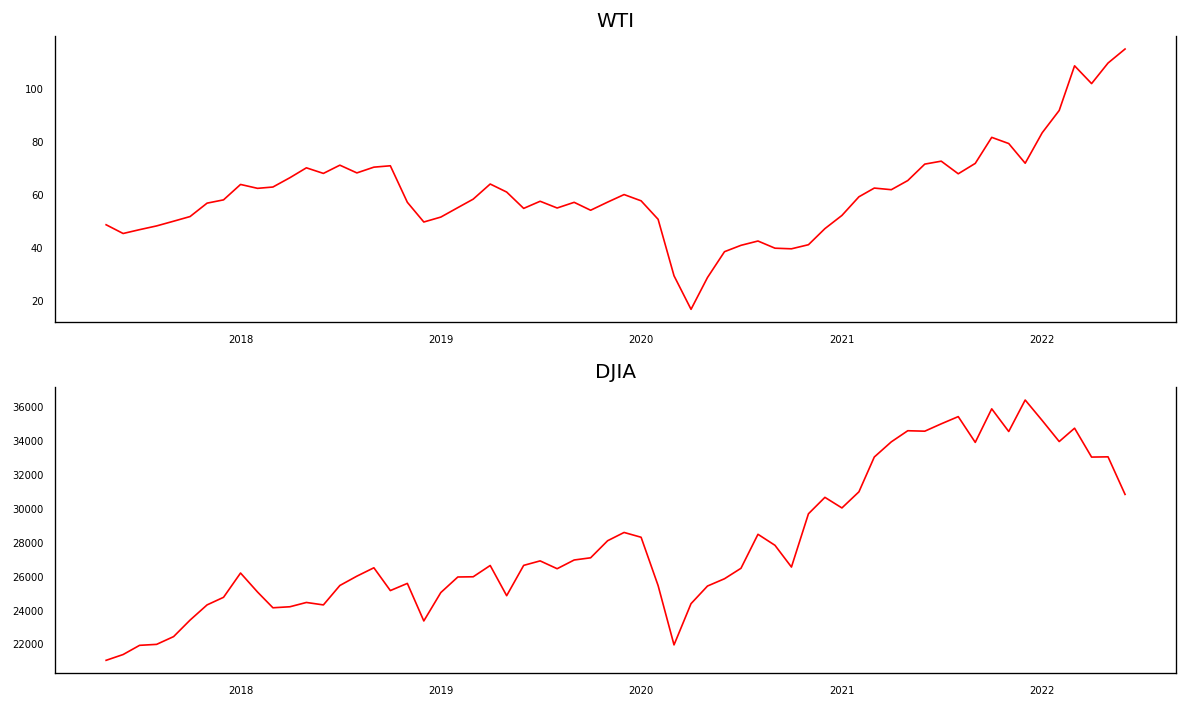

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [4]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,3)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 3): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2)), ">", adjust(cvt), ' =>  ' , trace > cvt)
        print(round(trace,6))
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
WTI ::  18.89 > 24.2761  =>   False
18.886839
DJIA ::  4.3 > 12.3212  =>   False
4.297653
GDP ::  0.06 > 4.1296  =>   False
0.055975


In [5]:
nobs = 8
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_test)  # (119, 8)
print(df_test.shape)  # (4, 8)

               WTI      DJIA           GDP
Date                                      
2021-11-01   79.15  34483.72  19782.460970
2021-12-01   71.71  36338.30  19794.743837
2022-01-01   83.22  35131.86  19737.188125
2022-02-01   91.64  33892.60  19738.821188
2022-03-01  108.50  34678.35  19716.957334
2022-04-01  101.78  32977.21  19672.479884
2022-05-01  109.55  32991.97  19667.793220
2022-06-01  114.84  30779.71  19707.763861
(8, 3)


In [6]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

In [7]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "WTI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.2874
 No. Lags Chosen       = 2
 Critical value 1%     = -3.566
 Critical value 5%     = -2.92
 Critical value 10%    = -2.598
 => P-Value = 0.6349. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "DJIA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5739
 No. Lags Chosen       = 0
 Critical value 1%     = -3.56
 Critical value 5%     = -2.918
 Critical value 10%    = -2.597
 => P-Value = 0.8768. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. 

In [8]:
df_differenced = df_train.diff().dropna()

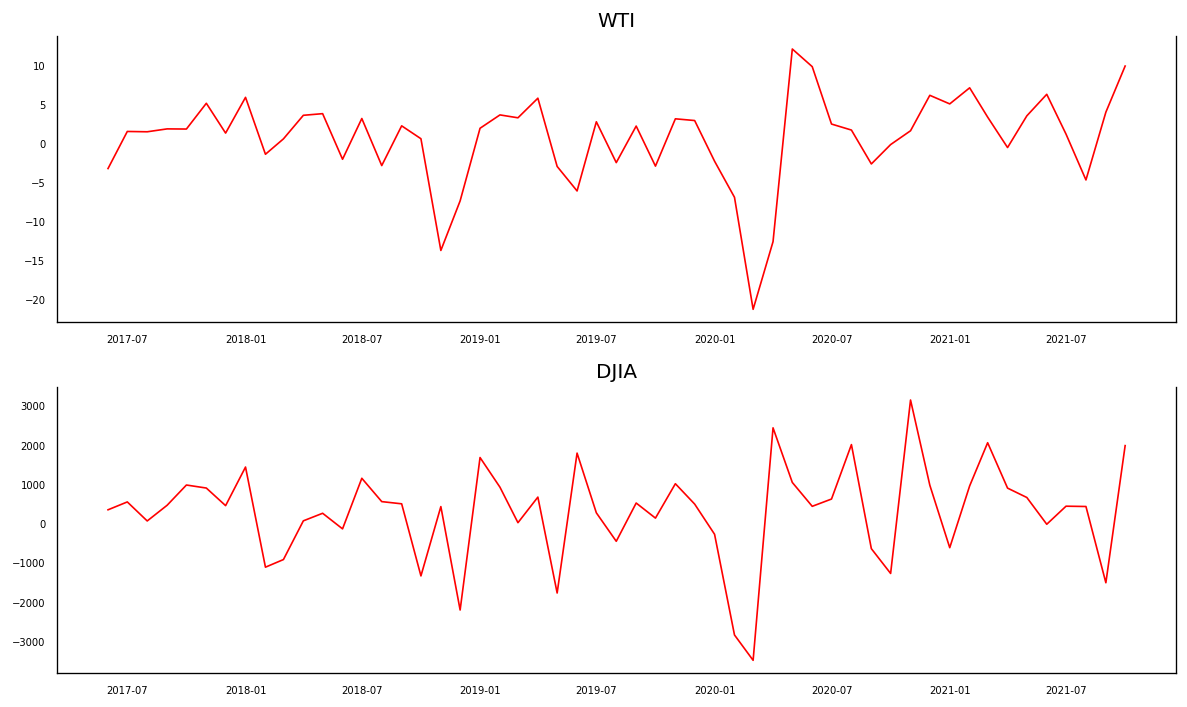

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_differenced[df_differenced.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [10]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "WTI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3883
 No. Lags Chosen       = 1
 Critical value 1%     = -3.566
 Critical value 5%     = -2.92
 Critical value 10%    = -2.598
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DJIA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.2983
 No. Lags Chosen       = 0
 Critical value 1%     = -3.563
 Critical value 5%     = -2.919
 Critical value 10%    = -2.597
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Te

In [11]:
df_differenced = df_differenced.diff().dropna()

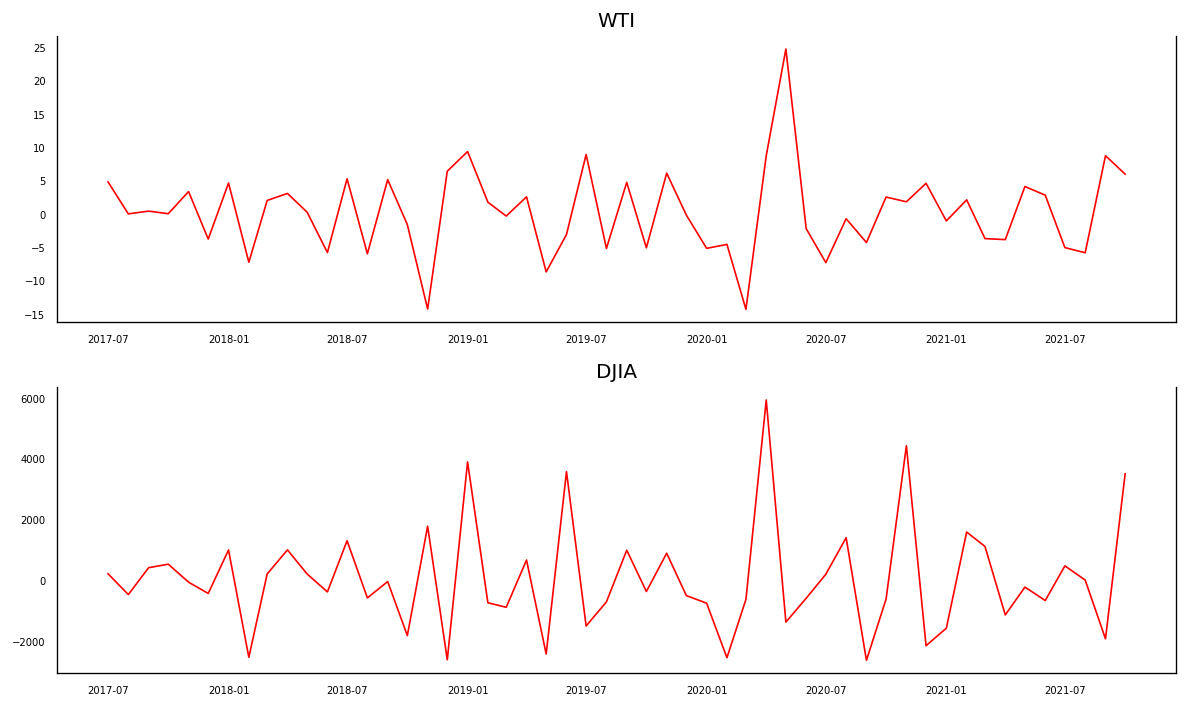

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_differenced[df_differenced.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [13]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "WTI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.2272
 No. Lags Chosen       = 3
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DJIA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1757
 No. Lags Chosen       = 5
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [14]:
model = VAR(df_differenced)
for i in [0,1,2,3]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 0
AIC :  30.727863674861194
BIC :  30.840435427856274
FPE :  22128287911693.3
HQIC:  30.771021028109303 

Lag Order = 1
AIC :  30.118610268927632
BIC :  30.573157476627475
FPE :  12043892298850.887
HQIC:  30.292306200977457 

Lag Order = 2
AIC :  29.927574856845066
BIC :  30.730624519124888
FPE :  9995222185193.75
HQIC:  30.23338074847136 

Lag Order = 3
AIC :  29.71411837837109
BIC :  30.872375703744943
FPE :  8170538837278.775
HQIC:  30.15355959200973 



C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
x = model.select_order(maxlags=3)
x.summary()

,AIC,BIC,FPE,HQIC
0,30.89,31.01,2.603e+13,30.93
1,30.24,30.71*,1.366e+13,30.42
2,30.00,30.81,1.078e+13,30.31
3,29.71*,30.87,8.171e+12*,30.15*


In [16]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Aug, 2022
Time:                     12:50:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    30.5732
Nobs:                     51.0000    HQIC:                   30.2923
Log likelihood:          -973.122    FPE:                1.20439e+13
AIC:                      30.1186    Det(Omega_mle):     9.60261e+12
--------------------------------------------------------------------
Results for equation WTI
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.207163         0.871371            0.238           0.812
L1.WTI         -0.032836         0.161611           -0.203           0.839
L1.DJIA         0.001093         0.000541            2.021           0.043
L1.GDP     

In [17]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

1


array([[   5.91      , 3492.45      ,  225.37754815]])

In [18]:
print(forecast_input[0])
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

[   5.91       3492.45        225.37754815]


,WTI_2d,DJIA_2d,GDP_2d
Date,,,
2021-11-01,3.297206,-2121.826987,459.011847
2021-12-01,-3.307661,585.559588,-242.119278
2022-01-01,1.529279,-55.946356,31.908301
2022-02-01,0.020223,32.688054,39.018073
2022-03-01,0.149829,-76.317178,-4.570500
2022-04-01,0.129639,56.836934,3.708957
2022-05-01,0.256255,-31.486911,13.050036
2022-06-01,0.133422,7.647951,5.667947


In [19]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [20]:
print(df_test)
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
#df_results.loc[:, ['WTI', 'DJIA', 'GDP']]
df_results

               WTI      DJIA           GDP
Date                                      
2021-11-01   79.15  34483.72  19782.460970
2021-12-01   71.71  36338.30  19794.743837
2022-01-01   83.22  35131.86  19737.188125
2022-02-01   91.64  33892.60  19738.821188
2022-03-01  108.50  34678.35  19716.957334
2022-04-01  101.78  32977.21  19672.479884
2022-05-01  109.55  32991.97  19667.793220
2022-06-01  114.84  30779.71  19707.763861


KeyError: 'WTI_1d'